<a href="https://colab.research.google.com/github/diyamanapetty/Handwritten-Digit-Recognition/blob/main/ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt



1.   Loading the data
2.   Pre-processing
3.   Building the ML model
4.   Training the model
5.   Testing the model



##**Loading the data**

In [ ]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## **Analyzing and Understanding the data(Optional step)**

In [ ]:
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
print(len(x_train))
print(len(y_train))

60000
60000


In [ ]:
#print(x_train[0]) #index 0 indicates first image
print(x_train[0].shape)

(28, 28)


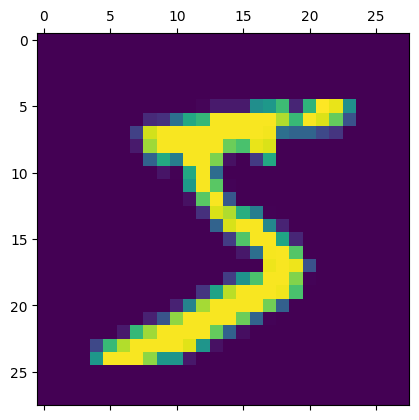

In [ ]:
plt.matshow(x_train[0]) #plotting the first image of x_train

In [ ]:
print(y_train[0])

5


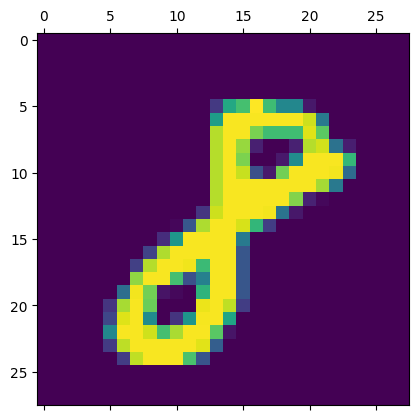

In [ ]:
plt.matshow(x_train[31])

In [ ]:
print(y_train[31])

8


you should get the same answer for x and y

In [ ]:
print(x_test.shape)

(10000, 28, 28)


10000 indicates number of pictures and 28,28 indicates pixel i.e 28x28

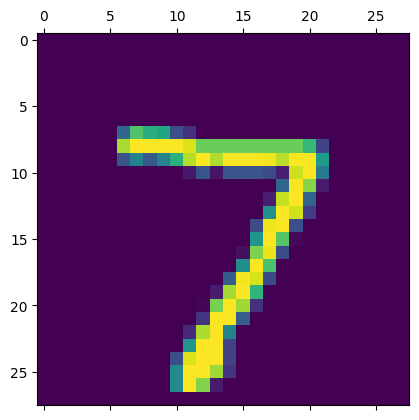

In [ ]:
plt.matshow(x_test[0])

In [ ]:
print(y_test)

[7 2 1 ... 4 5 6]


In [ ]:
print(set(y_test))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


We used set just to see if y_test and y_train me 0 to 9 all numbers are there

## **Preprocess data**

Example for 3x3

values = np.array([
    [5,10,5],
    [10,5,5],
    [5,10,5]
])
print(values.shape)
values_flattened = values.reshape(3*3)
print(values_flattened)

In [ ]:
x_train_flattened=x_train.reshape(60000,28*28)
x_test_flattened=x_test.reshape(10000,28*28)

In [ ]:
print(x_train_flattened.shape)
print(x_test_flattened.shape)

(60000, 784)
(10000, 784)


Both training and testing have been reshaped to 784

## **Building the ML model**

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(300,input_shape=(28*28,),activation='relu'), #Input Layer
    keras.layers.Dense(100,activation='sigmoid'), #Hidden Layer
    keras.layers.Dense(10,activation='sigmoid') #Output layer
])

Here in 3rd line 10 is the number of output i.e 0 to 9 there can be 10 outputs and 28*28 i.e 784 is the number of inputs
Comma after 28 indicates that it is a tuple of 1 input which is 784(28*28)
In first line 300 is the number of outputs for hidden layer. The output of first layer is the input of second layer which is understood and hence it is not necessary to mention the number of inputs in the second line

In [ ]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

## **Training the ML model**

In [ ]:
model.fit(x_train_flattened,y_train,batch_size=500,epochs=12)

Epoch 1/12
120/120 [==============================] - 5s 31ms/step - loss: 0.6906 - accuracy: 0.8239
Epoch 2/12
120/120 [==============================] - 6s 52ms/step - loss: 0.2691 - accuracy: 0.9290
Epoch 3/12
120/120 [==============================] - 4s 33ms/step - loss: 0.1976 - accuracy: 0.9451
Epoch 4/12
120/120 [==============================] - 5s 40ms/step - loss: 0.1597 - accuracy: 0.9540
Epoch 5/12
120/120 [==============================] - 5s 44ms/step - loss: 0.1377 - accuracy: 0.9609
Epoch 6/12
120/120 [==============================] - 4s 34ms/step - loss: 0.1209 - accuracy: 0.9649
Epoch 7/12
120/120 [==============================] - 2s 18ms/step - loss: 0.1072 - accuracy: 0.9694
Epoch 8/12
120/120 [==============================] - 2s 18ms/step - loss: 0.0989 - accuracy: 0.9712
Epoch 9/12
120/120 [==============================] - 2s 18ms/step - loss: 0.0930 - accuracy: 0.9725
Epoch 10/12
120/120 [==============================] - 3s 28ms/step - loss: 0.0831 - accura

Note: Increasing the epochs won't increase accuracy

## **Testing the ML Model**

In [ ]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0964 - accuracy: 0.9703


[0.09641165286302567, 0.970300018787384]

In [ ]:
index = 6 #checking for 6th image of test

score_array = model.predict(x_test_flattened)
print(score_array[index])
print(np.argmax(score_array[index]))
print(y_test[index])

313/313 [==============================] - 1s 2ms/step
[0.01692901 0.14709322 0.04994011 0.00604562 0.9994916  0.14395337
 0.14210927 0.20018198 0.63628227 0.5594702 ]
4
4


It shows that 6th image is 4.We'll check it by plotting it. Here 0.87, 093, and all shows accuracy


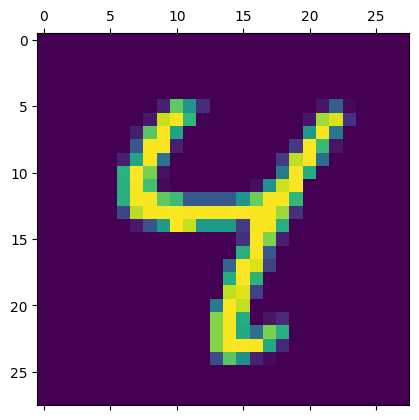

In [ ]:
plt.matshow(x_test[index])

## **Uploading custom image**

In [ ]:
import os
import cv2

In [ ]:
#os.mkdir('./test_data')

you should run this only once. Once the folder is made if you'll run it again it will show an error. Hence comment out the statement once the folder is made. So if you'll run again it won't show an error

In [ ]:
def resize_image(image):
  image = np.array(image)
  image = cv2.resize(image,(28,28))
  image = cv2.bitwise_not(image) #reverse black and white
  return image

In [ ]:
image = cv2.imread('./test_data/image.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
resized_image = resize_image(image)

To convert the image into black and white we use gray scale

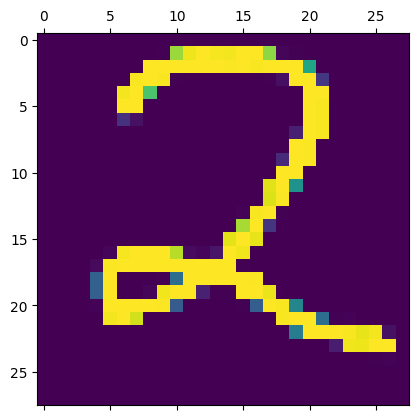

In [ ]:
plt.matshow(resized_image)

Matshow khud color daalta hai. To keep the original image as it is that is in black and white, we'll use cmap binary. Binary has only two colors. Note the above step plt.matshow(image) is not necessary. It will give coloured image. So we must write the following step instead of the above one to give a black and white image

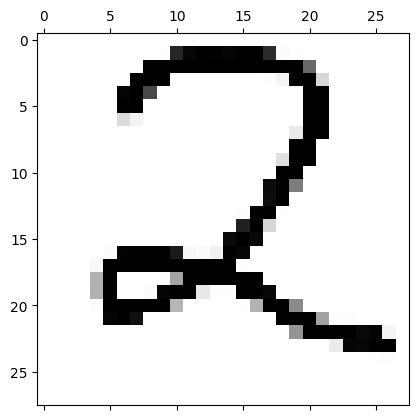

In [ ]:
plt.matshow(resized_image,cmap=plt.cm.binary)

In [ ]:
resized_image.shape

(28, 28)

In [ ]:
def predicting(image):
  image = image.reshape(1,28*28)
  score_array = model.predict(image)
  prediction = np.argmax(score_array)
  return prediction

You can either reshape the model, increase the dimension or put it into numpy array
Here we have used numpy



In [ ]:
print(predicting(resized_image))

1/1 [==============================] - 0s 22ms/step
2


Saving our model

In [ ]:
os.mkdir('./saved_models')

In [ ]:
model.save('./saved_models')

In [ ]:
!zip -r ./saved_models.zip ./saved_models

  adding: saved_models/ (stored 0%)
  adding: saved_models/fingerprint.pb (stored 0%)
  adding: saved_models/keras_metadata.pb (deflated 86%)
  adding: saved_models/assets/ (stored 0%)
  adding: saved_models/variables/ (stored 0%)
  adding: saved_models/variables/variables.data-00000-of-00001 (deflated 12%)
  adding: saved_models/variables/variables.index (deflated 58%)
  adding: saved_models/saved_model.pb (deflated 86%)
